# Practica Final Machine Learning

# Importar biblitoecas y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv("C:/Users/Usuario/Documents/github/Practica_Final_ML/airbnb-listings-extract (1).csv",sep=";",low_memory=False)
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


# Análisis descriptivo de los datos

##### Antes de proceder con el análisis descrpitivo de los datos se hace una eliminación de las variables que no aportan información para este estudio.

##### Dichas variables son: ID, Listing URL, Scrape ID, Last Scraped, Name,Summary, Space, Description, Neighbourhood Overview, Notes, Transit, Access, Interaction, House Rules, Thumbnail URL, Medium URL, Picture URL, XL Picture URL, Host ID, Host URL, Host Location, Host About, Host Response Time,Host Response Rate, Host Acceptance Rate, Host Thumbnail URL, Host Picture URL, Host Neighbourhood, Host Listings Count, Host Total Listings Count, Street, Neighbourhood, Neighbourhood Cleansed,State, Market, Smart Location, Country, Latitude, Longitude, Extra people, Calendar Updated, Has availabiliy, Calendar last scraped, First Review, Last Review, License, Jurisdiction Names, Geolocation, Reviews per month.

##### Motivos: Como se puede apreciar son variables categóricas que entre usuraios no siguen ningún esquema de respuesta y que no inciden en el precio de alquiler. 

##### Muchas de estas variables tienen su versión numérica en otras. Por ejemplo, "Neighbourhood", "Neighbourhood Cleansed" y "Neighbourhood Group Cleansed", siendo esta última la que no descartamos ya que nos da la misma información de manera ordenada que podemos tratar.

In [37]:
#Renombrar variables para poder hacer el conteo y decidir si las mantenemos o las quitamos del dataset.
data_new = data.rename(columns={'Experiences Offered': 'Experiences_offered', 
                                "Host Acceptance Rate":"Host_acceptance_rate", 
                                "Host Total Listings Count": "host_total_listings_count", 
                                "Host Listings Count": "host_listings_count",
                               "Neighbourhood Cleansed": "Neighbourhood_cleansed",
                               "Neighbourhood Group Cleansed": "Neighbourhood_group_cleansed",
                               "Guests Included": "Guests_included",
                               "Availability 30": "Availability_30",
                                "Bed Type": "Bed_type",
                               "Calendar Updated": "Calendar_updated", 
                               "Has Availability": "Has_availability",
                                "Calculated host listings count":"Calculated_host_listings_count",
                               "Extra People": "Extra_people", "Weekly Price": "Weekly_price", "Monthly Price": "Monthly_price",
                               "Host Name": "Host_Name", "Host Verifications": "Host_Verifications"}) #change a from A

In [56]:
print(data_new.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences_offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host_Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host_acceptance_rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'Host_Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood_cleansed',
       'Neighbourhood_group_cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_type', 'Amenities', 'Square Feet', 'Price', 'Weekly_price',
       'Month

# Todos estos son overviews de como son las variables para ver si las descartabamos o no. 
# Lo podemos quitar pero lo dejo por si quereis mirarlo

In [66]:
data_new.Experiences_offered.value_counts()

none        14763
business        8
family          3
social          3
romantic        3
Name: Experiences_offered, dtype: int64

In [67]:
data_new.Host_acceptance_rate.value_counts()

100%    23
74%      2
0%       2
96%      2
80%      2
85%      2
83%      1
67%      1
44%      1
97%      1
95%      1
88%      1
Name: Host_acceptance_rate, dtype: int64

In [68]:
data_new.host_total_listings_count.value_counts()

1.0      6353
2.0      2297
3.0      1212
4.0       752
5.0       424
         ... 
63.0        1
519.0       1
265.0       1
81.0        1
50.0        1
Name: host_total_listings_count, Length: 56, dtype: int64

In [69]:
data_new.host_listings_count.value_counts()

1.0      6353
2.0      2297
3.0      1212
4.0       752
5.0       424
         ... 
63.0        1
519.0       1
265.0       1
81.0        1
50.0        1
Name: host_listings_count, Length: 56, dtype: int64

In [70]:
data_new.Neighbourhood.value_counts()

MalasaÃ±a      895
La Latina      810
Embajadores    795
Sol            716
Justicia       559
              ... 
WÃ¤hring         1
Camden Town      1
DÃ¶bling         1
Rosebery         1
Ravenna          1
Name: Neighbourhood, Length: 390, dtype: int64

In [71]:
data_new.Neighbourhood_cleansed.value_counts()

Embajadores               1849
Universidad               1363
Palacio                   1084
Sol                        942
Justicia                   789
                          ... 
Alt  Treptow                 1
WÂŠhring                     1
DÂšbling                     1
Frankfurter Allee Nord       1
Ravenna                      1
Name: Neighbourhood_cleansed, Length: 478, dtype: int64

In [72]:
data_new.Neighbourhood_group_cleansed.value_counts()

Centro                     6780
ChamberÃ­                   960
Salamanca                   883
Arganzuela                  793
TetuÃ¡n                     464
                           ... 
Treptow - KÃ¶penick           1
Magnolia                      1
Tempelhof - SchÃ¶neberg       1
Ballard                       1
Spandau                       1
Name: Neighbourhood_group_cleansed, Length: 49, dtype: int64

In [73]:
data_new.Accommodates.value_counts()

2     5257
4     3275
1     2056
3     1421
6     1200
5      712
8      327
7      200
10     116
9       70
12      56
16      44
11      25
14      13
15       5
13       3
Name: Accommodates, dtype: int64

In [74]:
data_new.Guests_included.value_counts()

1     9738
2     3475
4      757
3      444
6      144
5      104
8       44
7       30
10      13
12      10
9        8
16       6
15       4
14       2
0        1
Name: Guests_included, dtype: int64

In [75]:
data_new.Bed_type.value_counts()

Real Bed         14456
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: Bed_type, dtype: int64

In [76]:
data_new.Calendar_updated.value_counts()

today            3924
yesterday        1212
2 weeks ago      1212
a week ago       1140
3 days ago        842
                 ... 
35 months ago       1
27 months ago       1
57 months ago       1
58 months ago       1
37 months ago       1
Name: Calendar_updated, Length: 57, dtype: int64

In [77]:
data_new.Has_availability.value_counts()

t    12
Name: Has_availability, dtype: int64

In [78]:
data_new.Calculated_host_listings_count.value_counts()

1.0      6990
2.0      2171
3.0      1099
4.0       710
5.0       432
         ... 
25.0       25
17.0       25
24.0       20
106.0      17
65.0        2
Name: Calculated_host_listings_count, Length: 45, dtype: int64

In [79]:
data_new.Extra_people.value_counts()

0      7598
10     1996
15     1477
20      934
5       573
       ... 
4         1
178       1
145       1
274       1
276       1
Name: Extra_people, Length: 68, dtype: int64

# Se eliminan las variables que no son relevantes para el estudio

In [113]:
data=pd.read_csv('C:/Users/aleja_l/Desktop/MACHINE-LEARNING/TrabajoFinalML/airbnb-listings-extract.csv',sep=';',low_memory=False)
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [114]:
data.isnull().sum()

ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 1
                                  ... 
Cancellation Policy                  0
Calculated host listings count       4
Reviews per Month                 3162
Geolocation                          0
Features                             1
Length: 89, dtype: int64

Lo primero que vamos a ver es como está compuesto nuestro dataset para observar que variables nos serán de interés. Vemos que disponemos de 89 variables, las cuales nos dan información acerca de los alojamientos de Airbnb.

Eliminamos la variable 'ID'  ya que es una forma distinta de denotar lo mismo, en este caso el alojamiento concreto, y ya disponemos de esa información con la observación.

In [115]:
data = data.drop(['ID'], axis=1)

Vamos a eliminar todas las variable tipo 'Url', ya que no nos aportan información (aunque podría resultar interesante realizar algún estudio sobre el contenido de estos links e implementarlo a nuestro trabajo) y solo entorpecerán nuestro objetivo. 
Primero vemos cuáles son:

In [116]:
url= [s for s in data if "Url"  in s]
url=list(url)
print(url)

['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url']


In [117]:
URL=[s for s in data if "URL"  in s]
URL=list(URL)
print(URL)

['Host URL']


Quitamos estas variables de nuestro dataset

In [118]:
data_new_1=data.drop(columns=url)
data_new_1=data_new_1.drop(columns=URL)
data_new_1.shape

(14780, 80)

También vamos a eliminar todas aquellas variables que sean párrafos, ya que entorpecen nuestro estudio, y esa información esta recogida dentro de otras variables.
También pondremos un ejemplo gráfico para ver si alguna de estas variables afecta realmente al precio.
(Quedarnos con las que pueden ser suma de electrodomésticos, internet,etc..)

In [119]:
data_new_1=data_new_1.drop(columns=['Name','Description','Summary','Space','Neighborhood Overview','Notes','Transit','Access',
                          'Interaction','House Rules','Host About','Host Neighbourhood',
                            'Street','Neighbourhood','Amenities','State','Market',
                            'Country','Jurisdiction Names'], axis=1)
data_new_1.shape

(14780, 61)

# MISSINGS

In [120]:
df_nulos_col =data_new_1.isnull().sum()
pd_series_null_rows = data_new_1.isnull().sum(axis=1).sort_values(ascending=False)
pd_null_columnas=pd.DataFrame(df_nulos_col, columns=['nulos_columnas'])
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/data_new_1.shape[0]
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/data_new_1.shape[1]

In [121]:
pd_null_columnas

,nulos_columnas,porcentaje_columnas
Scrape ID,0,0.000000
Last Scraped,0,0.000000
Experiences Offered,0,0.000000
Host ID,0,0.000000
Host Name,3,0.000203
...,...,...
Cancellation Policy,0,0.000000
Calculated host listings count,4,0.000271
Reviews per Month,3162,0.213938
Geolocation,0,0.000000


In [122]:
pd_null_filas

,nulos_filas,porcentaje_filas
8891,25,0.409836
14255,25,0.409836
94,23,0.377049
10313,23,0.377049
3317,23,0.377049
...,...,...
1374,2,0.032787
4978,2,0.032787
6932,2,0.032787
2135,2,0.032787


In [123]:
threshold=0.7
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
df_filter_null = data_new_1.loc[:, list_vars_not_null]
df_filter_null.shape

(14780, 55)

In [124]:
df1= df_filter_null
df1.head()

,Scrape ID,Last Scraped,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,20170306202425,2017-03-07,none,58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,...,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,20170407214050,2017-04-08,none,102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,...,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,20170407214050,2017-04-08,none,102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,...,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,20170407214050,2017-04-08,none,131794,Damien,2010-05-25,"Barcelona, Cataluña, Spain",within an hour,100.0,27.0,...,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,20170407214050,2017-04-08,none,54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Por filas observamos que no tenemos ninguna observación relevante que eliminar

In [125]:
index_null_filas = np.where(pd_null_filas['porcentaje_filas']>= 0.6)[0]
index_null_filas = list(index_null_filas)
print(index_null_filas)

[]


Ahora vamos a ver los tipos de variables que tenemos, y vamos a dividirlas en dos listas, una que contenga las variables categóricas y otras las numéricas

In [126]:
df1.dtypes

Scrape ID                           int64
Last Scraped                       object
Experiences Offered                object
Host ID                             int64
Host Name                          object
Host Since                         object
Host Location                      object
Host Response Time                 object
Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                 object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
Zipcode                            object
Smart Location                     object
Country Code                       object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         

In [127]:
Var_discretas=list(df1.select_dtypes('object').columns)
Var_discretas

['Last Scraped',
 'Experiences Offered',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Verifications',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'Zipcode',
 'Smart Location',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Calendar Updated',
 'Calendar last Scraped',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation',
 'Features']

In [128]:
Var_continuas=list(df1.select_dtypes(np.number).columns)
Var_continuas

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Host Total Listings Count',
 'Latitude',
 'Longitude',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Calculated host listings count',
 'Reviews per Month']

Vamos a proceder ahora a seguir tratar los missings que tenemos en nuestro dataset, para ello vamos a sustituir estos valores missings por la moda en las variables categóricas y por la mediana en las variables numéricas

In [129]:
df1[Var_discretas].fillna(df1[Var_discretas].mode())

,Last Scraped,Experiences Offered,Host Name,Host Since,Host Location,Host Response Time,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,...,Property Type,Room Type,Bed Type,Calendar Updated,Calendar last Scraped,First Review,Last Review,Cancellation Policy,Geolocation,Features
0,2017-03-07,none,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,within an hour,"email,phone,reviews,kba",78733,Centro,Austin,...,Loft,Entire home/apt,Real Bed,today,2017-03-06,2016-03-13,2017-02-26,moderate,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,2017-04-08,none,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,...,Apartment,Entire home/apt,Real Bed,today,2017-04-08,2017-03-05,2017-03-05,super_strict_30,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,2017-04-08,none,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,...,Apartment,Entire home/apt,Real Bed,today,2017-04-08,NaN,NaN,super_strict_30,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,2017-04-08,none,Damien,2010-05-25,"Barcelona, Cataluña, Spain",within an hour,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,Eixample,Barcelona,...,Apartment,Entire home/apt,Real Bed,today,2017-04-08,2016-04-17,2017-03-02,strict,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,2017-04-08,none,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",within an hour,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,Eixample,Barcelona,...,Apartment,Entire home/apt,Real Bed,today,2017-04-08,NaN,NaN,flexible,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,2017-05-02,none,Blair,2013-12-18,"New York, New York, United States",within a few hours,"email,phone,reviews,jumio",Bedford-Stuyvesant,Brooklyn,Brooklyn,...,Apartment,Entire home/apt,Real Bed,5 days ago,2017-05-02,2014-01-02,2017-04-22,strict,"40.67894535,-73.9393421856","Host Is Superhost,Host Has Profile Pic,Host Id..."
14776,2017-04-06,none,Sylvia,2017-03-24,France,NaN,"email,phone",Vaugirard,NaN,Paris,...,Bed & Breakfast,Private room,Real Bed,3 days ago,2017-04-06,NaN,NaN,flexible,"48.8361969404,2.29404476423","Host Has Profile Pic,Is Location Exact,Instant..."
14777,2017-04-05,none,Ivan,2015-07-06,"Madrid, Community of Madrid, Spain",within an hour,"email,phone,reviews,jumio",Batignolles-Monceau,NaN,Paris,...,Apartment,Entire home/apt,Real Bed,5 days ago,2017-04-05,2016-09-24,2017-03-26,strict,"48.8888092157,2.31617315267","Host Is Superhost,Host Has Profile Pic,Host Id..."
14778,2016-05-18,none,Kc,2013-03-20,"Denver, Colorado, United States",within a few hours,"email,phone,facebook,linkedin,reviews,jumio",City Park West,NaN,Denver,...,Apartment,Entire home/apt,Real Bed,yesterday,2016-05-18,2016-04-17,2016-04-17,moderate,"39.7422046438,-104.959933049","Host Has Profile Pic,Host Identity Verified,Is..."


In [130]:
df1[Var_continuas].fillna(df1[Var_continuas].median())

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,20170306202425,58386783,100.0,1.0,1.0,30.337361,-97.863277,2,1.0,1.0,...,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.50
1,20170407214050,102947901,100.0,162.0,162.0,41.389683,2.172625,4,1.0,1.0,...,1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,106.0,0.86
2,20170407214050,102947901,100.0,162.0,162.0,41.393035,2.162173,4,1.0,1.0,...,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,106.0,1.20
3,20170407214050,131794,100.0,27.0,27.0,41.396967,2.167418,8,2.0,3.0,...,13,92.0,10.0,9.0,10.0,10.0,10.0,9.0,24.0,1.09
4,20170407214050,54310958,99.0,207.0,207.0,41.388685,2.155150,5,1.0,2.0,...,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,92.0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,20170502132028,10700163,100.0,1.0,1.0,40.678945,-73.939342,2,1.0,1.0,...,30,95.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,0.74
14776,20170404145355,122351810,100.0,1.0,1.0,48.836197,2.294045,1,1.0,1.0,...,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.20
14777,20170404145355,9844427,100.0,1.0,1.0,48.888809,2.316173,5,1.0,2.0,...,17,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,2.63
14778,20160516142622,5552771,100.0,1.0,1.0,39.742205,-104.959933,4,1.0,1.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.94


In [131]:
df1[Var_discretas]=df1[Var_discretas].fillna(df1[Var_discretas].mode())
df1[Var_continuas]=df1[Var_continuas].fillna(df1[Var_continuas].median())
df1.isnull().sum()

Scrape ID                            0
Last Scraped                         0
Experiences Offered                  0
Host ID                              0
Host Name                            3
Host Since                           3
Host Location                       43
Host Response Time                1899
Host Response Rate                   0
Host Listings Count                  0
Host Total Listings Count            0
Host Verifications                   6
Neighbourhood Cleansed               0
Neighbourhood Group Cleansed      1019
City                                 6
Zipcode                            506
Smart Location                       0
Country Code                         0
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                     

Observamos que hay variables que aún contienen missings, todas ellas categóricas, así que vamos a seleccionar estas variables y vamos a imputar los missings por la mediana.

In [132]:
columnas =list(df1.columns)
index = list(np.where(df1[columnas].isnull().sum() !=0)[0])
col_missing = df1.columns[index]
col_missing

Index(['Host Name', 'Host Since', 'Host Location', 'Host Response Time',
       'Host Verifications', 'Neighbourhood Group Cleansed', 'City', 'Zipcode',
       'First Review', 'Last Review', 'Features'],
      dtype='object')

In [133]:
df1[col_missing] = df1[col_missing].fillna('Sin Valor')

In [134]:
df1.isnull().sum()

Scrape ID                         0
Last Scraped                      0
Experiences Offered               0
Host ID                           0
Host Name                         0
Host Since                        0
Host Location                     0
Host Response Time                0
Host Response Rate                0
Host Listings Count               0
Host Total Listings Count         0
Host Verifications                0
Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
City                              0
Zipcode                           0
Smart Location                    0
Country Code                      0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                       

Como podemos observar ya nos contamos con valores missings en nuestro dataset.
Ahora vamos a estudiar las correlaciones de nuestras variables:

# CORRELACIONES Y PCA

Vamos a ver la correlación entre estas variables numéricas ya que posteriormente puede mejorar nuestro estudio eliminar aquellas que aporten gran cantidad de información similar, y ver si tiene sentido realizar un análisis de componentes principales para optimizar nuestro estudio.
También vamos a ver aquellas que tengan una correlación por encima de 0,8

In [135]:
df1_cor=df1[Var_continuas].corr(method='pearson')
df1_cor

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Scrape ID,1.000000,0.038972,0.007997,0.010549,0.010549,-0.038847,0.163784,-0.001419,0.001065,-0.002246,...,0.004170,-0.010181,-0.019608,-0.007755,-0.007995,-0.007292,-0.006267,-0.017290,0.009236,-0.016660
Host ID,0.038972,1.000000,-0.012463,-0.078729,-0.078729,-0.006227,0.019640,-0.101089,-0.058871,-0.075857,...,-0.244239,0.045219,0.092866,0.085526,0.077072,0.069904,0.049598,0.005551,-0.120852,0.100034
Host Response Rate,0.007997,-0.012463,1.000000,-0.022519,-0.022519,-0.013900,0.006574,0.040288,-0.027725,0.008425,...,0.102884,0.056875,0.031045,0.040492,0.049756,0.045435,0.008996,0.075407,-0.042163,0.135497
Host Listings Count,0.010549,-0.078729,-0.022519,1.000000,1.000000,0.001563,0.049432,0.227165,0.234428,0.186003,...,-0.115634,-0.097818,-0.039177,-0.000924,-0.138913,-0.121377,-0.000404,-0.121445,0.922842,-0.133723
Host Total Listings Count,0.010549,-0.078729,-0.022519,1.000000,1.000000,0.001563,0.049432,0.227165,0.234428,0.186003,...,-0.115634,-0.097818,-0.039177,-0.000924,-0.138913,-0.121377,-0.000404,-0.121445,0.922842,-0.133723
Latitude,-0.038847,-0.006227,-0.013900,0.001563,0.001563,1.000000,-0.480274,0.003572,-0.013852,-0.014495,...,0.015306,-0.017441,-0.021835,-0.023133,-0.014062,-0.016324,-0.027307,-0.008137,-0.002634,0.014651
Longitude,0.163784,0.019640,0.006574,0.049432,0.049432,-0.480274,1.000000,0.018850,0.029499,0.039928,...,-0.026993,-0.008907,0.001525,0.014281,-0.005936,-0.008528,-0.006659,-0.022276,0.050815,-0.020597
Accommodates,-0.001419,-0.101089,0.040288,0.227165,0.227165,0.003572,0.018850,1.000000,0.430835,0.723412,...,0.053389,-0.059784,-0.075940,-0.044941,-0.085565,-0.068891,-0.012932,-0.045808,0.254854,0.030019
Bathrooms,0.001065,-0.058871,-0.027725,0.234428,0.234428,-0.013852,0.029499,0.430835,1.000000,0.524489,...,-0.076919,0.019941,0.028232,0.031498,-0.016521,-0.014235,0.025434,-0.013589,0.287173,-0.083419
Bedrooms,-0.002246,-0.075857,0.008425,0.186003,0.186003,-0.014495,0.039928,0.723412,0.524489,1.000000,...,-0.049190,0.008406,-0.001164,0.005736,-0.026346,-0.011166,-0.023877,-0.010527,0.219415,-0.064519


In [136]:
df1_cor['Price']

Scrape ID                        -0.056937
Host ID                          -0.053114
Host Response Rate                0.004907
Host Listings Count               0.226505
Host Total Listings Count         0.226505
Latitude                         -0.020303
Longitude                         0.000802
Accommodates                      0.520432
Bathrooms                         0.383238
Bedrooms                          0.495599
Beds                              0.440032
Price                             1.000000
Security Deposit                  0.238390
Cleaning Fee                      0.464952
Guests Included                   0.300520
Extra People                      0.123123
Minimum Nights                    0.027427
Maximum Nights                    0.001530
Availability 30                   0.109988
Availability 60                   0.068016
Availability 90                   0.035855
Availability 365                  0.061177
Number of Reviews                -0.058428
Review Scor

In [137]:
corr = df1[Var_continuas].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.65]

,level_0,level_1,correlation
131,Host Total Listings Count,Host Listings Count,1.000000
659,Availability 90,Availability 60,0.963501
964,Calculated host listings count,Host Total Listings Count,0.922842
963,Calculated host listings count,Host Listings Count,0.922842
626,Availability 60,Availability 30,0.921476
658,Availability 90,Availability 30,0.849756
327,Beds,Accommodates,0.837126
951,Review Scores Value,Review Scores Rating,0.765732
791,Review Scores Accuracy,Review Scores Rating,0.735448
329,Beds,Bedrooms,0.731142


In [138]:
def correlation(x,threshold):
    correlated_cols=[]
    corr_matrix=x.corr('pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.append(colname)
    return correlated_cols

In [139]:
correlation(df1[Var_continuas], 0.65)

['Host Total Listings Count',
 'Bedrooms',
 'Beds',
 'Beds',
 'Availability 60',
 'Availability 90',
 'Availability 90',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Cleanliness',
 'Review Scores Communication',
 'Review Scores Value',
 'Calculated host listings count',
 'Calculated host listings count']

In [140]:
lista = set(correlation(df1, 0.7))
variables_cor = list(lista)
variables_cor

['Availability 60',
 'Review Scores Value',
 'Bedrooms',
 'Beds',
 'Calculated host listings count',
 'Availability 90',
 'Review Scores Accuracy',
 'Host Total Listings Count',
 'Review Scores Communication']

In [141]:
df1=df1.drop(columns=['Review Scores Communication','Beds','Calculated host listings count','Review Scores Accuracy',
                      'Host Total Listings Count','Review Scores Value','Availability 90','Availability 60','Bedrooms'], axis=1)
df1.shape


(14780, 46)

# LO DEL PCA NO ESTA CLARO

Vamos a observar que variables están más correladas con nuestra variable objetivo Price

Ahora vamos a realizar un análisis de componentes principales de nuestras variables continuas para que la mayor cantidad de información quede recogida en menos dimensiones.
Primero vamos a eliminar de este conjunto de variables la variable Price ya que es la que vamos a intebtar predecir

In [65]:
Var_continuas2 = list(df1.select_dtypes(np.number).columns)
Var_continuas2

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Latitude',
 'Longitude',
 'Accommodates',
 'Bathrooms',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Location',
 'Reviews per Month']

In [66]:
Var_continuas2.pop(8)
Var_continuas2

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Latitude',
 'Longitude',
 'Accommodates',
 'Bathrooms',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Location',
 'Reviews per Month']

In [67]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [68]:
df1[Var_continuas2].describe()

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,...,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Reviews per Month
count,1.478000e+04,1.478000e+04,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,...,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000
mean,2.017037e+13,3.608080e+07,95.488566,12.511502,40.497626,-3.858041,3.277808,1.280683,166.603721,28.999865,...,3.050474,945.168742,8.954736,202.104465,22.632273,92.212585,9.479635,9.707172,9.637889,1.726673
std,5.667971e+08,3.425360e+07,14.310050,34.087092,4.641387,14.123146,2.097291,0.657514,77.379974,23.908403,...,12.266517,8439.321218,9.333252,127.886822,38.290244,7.978675,0.915574,0.723806,0.708946,1.678401
min,2.016010e+13,1.745300e+04,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,0.020000
25%,2.017041e+13,6.787360e+06,100.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,150.000000,20.000000,...,1.000000,365.000000,0.000000,78.000000,1.000000,90.000000,9.000000,10.000000,9.000000,0.610000
50%,2.017041e+13,2.464875e+07,100.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,150.000000,25.000000,...,2.000000,1125.000000,6.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,1.200000
75%,2.017041e+13,5.432919e+07,100.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,150.000000,30.000000,...,3.000000,1125.000000,14.000000,319.000000,27.000000,97.000000,10.000000,10.000000,10.000000,2.220000
max,2.017062e+13,1.247534e+08,100.000000,519.000000,55.966912,153.371427,16.000000,8.000000,990.000000,662.000000,...,1125.000000,1000000.000000,30.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,17.210000


El PCA identifica las direcciones con mayor varianza, por tanto será necesario estandarizar los datos ya que la escala de las variables es diferente, y entonces las variables con mayor escala dominarían al resto

In [36]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df1[Var_continuas2])
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_

array([[ 7.48065040e-04, -1.22461940e-01, -6.32734216e-02,
         1.57618490e-01,  1.65858997e-02,  3.03196815e-03,
         2.06839625e-01,  1.23946540e-01,  4.00873359e-02,
         1.06137014e-01,  1.41389915e-01,  8.55878746e-02,
         2.17076437e-02,  2.61492160e-03,  8.22514193e-02,
         1.26495952e-01, -3.10034866e-02, -5.01925614e-01,
        -4.65241955e-01, -4.64324255e-01, -3.58558178e-01,
        -1.44191227e-01],
       [-3.46412710e-02, -1.14583460e-01,  4.76710673e-02,
         1.94610962e-01, -1.27590244e-02, -2.15959649e-03,
         4.67385215e-01,  3.71358237e-01,  2.55106581e-01,
         3.67768507e-01,  4.13058512e-01,  2.84215392e-01,
         4.38529553e-02,  1.19854976e-03, -1.50300912e-02,
         6.00296621e-02,  2.15596380e-02,  1.99189760e-01,
         2.04033015e-01,  1.39683914e-01,  1.73818667e-01,
         4.81633259e-03],
       [-2.75239733e-02, -1.52319774e-01,  2.18766625e-01,
        -1.66686640e-01,  9.62888987e-02, -1.07589721e-01,
    

In [37]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df1[Var_continuas2].columns,
    index   = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'
               ,'PC21','PC22'])

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,...,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Reviews per Month
PC1,0.000748,-0.122462,-0.063273,0.157618,0.016586,0.003032,0.206840,0.123947,0.040087,0.106137,...,0.021708,0.002615,0.082251,0.126496,-0.031003,-0.501926,-0.465242,-0.464324,-0.358558,-0.144191
PC2,-0.034641,-0.114583,0.047671,0.194611,-0.012759,-0.002160,0.467385,0.371358,0.255107,0.367769,...,0.043853,0.001199,-0.015030,0.060030,0.021560,0.199190,0.204033,0.139684,0.173819,0.004816
PC3,-0.027524,-0.152320,0.218767,-0.166687,0.096289,-0.107590,0.091561,-0.116519,-0.096091,-0.091460,...,-0.077098,-0.006637,-0.264335,-0.046023,0.613953,-0.060871,-0.106182,-0.061102,-0.050085,0.568560
PC4,0.272652,0.023519,0.059562,0.028971,-0.640689,0.679798,0.050878,0.031496,-0.114623,-0.083333,...,-0.040675,0.004432,0.018104,0.043935,0.091676,-0.013667,0.002838,-0.014621,-0.000069,0.096072
PC5,0.059223,0.025062,0.171562,0.204976,-0.002963,0.055125,0.043691,0.094777,0.052671,0.030026,...,0.086976,-0.010615,-0.620564,-0.656026,-0.164349,-0.052298,-0.057642,-0.071104,-0.001704,-0.098825
PC6,-0.150089,-0.623988,0.079659,0.009161,-0.152254,0.066466,-0.218824,-0.152399,0.262597,0.251730,...,0.447245,0.067705,-0.076004,0.112404,0.176990,0.041306,-0.001642,0.010128,0.018743,-0.130114
PC7,0.196661,-0.275622,-0.224150,0.550037,0.169685,-0.038723,0.064166,0.273174,-0.320440,-0.144360,...,-0.079181,0.172945,0.043387,0.121158,0.188472,0.042833,0.106797,-0.031171,0.128668,0.077440
PC8,-0.039941,0.029169,0.063282,-0.082940,-0.019960,0.003328,-0.004049,-0.070217,0.045953,0.006581,...,-0.143996,0.969899,-0.029041,-0.032487,-0.055699,-0.004812,-0.005864,-0.007726,-0.015346,-0.039395
PC9,0.590701,0.309510,0.225694,-0.081536,0.196518,-0.048465,0.051613,0.056064,0.196543,0.009216,...,0.562062,0.107786,0.084084,0.148874,0.014658,-0.018050,-0.021974,0.000076,-0.036933,0.131843
PC10,-0.640235,0.401175,0.208743,0.203265,-0.170074,0.029987,0.038101,0.155698,-0.001890,0.109154,...,0.223042,0.059362,0.150338,0.047614,0.028616,-0.062543,0.007442,-0.075173,0.016941,0.284799


In [38]:
print(modelo_pca.explained_variance_ratio_)

[0.11926852 0.10814552 0.0836415  0.06946339 0.06603998 0.05066541
 0.04741764 0.04541906 0.04533525 0.04339857 0.04213486 0.04200187
 0.03771644 0.03096574 0.0301939  0.02835935 0.02277551 0.02240023
 0.0218905  0.01674768 0.01337943 0.01263965]


In [40]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.11926852, 0.22741405, 0.31105554, 0.38051893, 0.44655891,
       0.49722432, 0.54464197, 0.59006103, 0.63539628, 0.67879484,
       0.7209297 , 0.76293157, 0.80064801, 0.83161375, 0.86180765,
       0.89016699, 0.9129425 , 0.93534274, 0.95723324, 0.97398092,
       0.98736035, 1.        ])

Text(0, 0.5, 'Por. varianza acumulada')

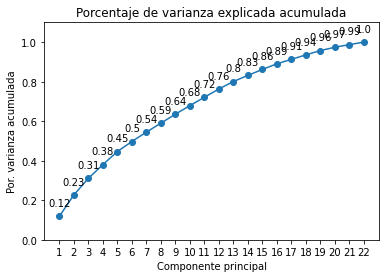

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df1[Var_continuas2].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df1[Var_continuas2].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

In [45]:
df1['Accommodates'].head()

0    2
1    4
2    4
3    8
4    5
Name: Accommodates, dtype: int64

# TRANSFORMACIONES

In [142]:
import category_encoders
from category_encoders import TargetEncoder
encoder=TargetEncoder()
df1[Var_discretas]= encoder.fit_transform(df1[Var_discretas], df1['Price'])

In [143]:
df_cord = df1[Var_discretas].corr(method='pearson')
df_cord

,Last Scraped,Experiences Offered,Host Name,Host Since,Host Location,Host Response Time,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,...,Property Type,Room Type,Bed Type,Calendar Updated,Calendar last Scraped,First Review,Last Review,Cancellation Policy,Geolocation,Features
Last Scraped,1.000000e+00,2.513564e-02,3.317108e-01,2.908936e-01,5.302278e-01,7.540813e-02,6.436255e-02,6.086988e-01,5.497869e-01,5.859526e-01,...,2.253502e-01,8.773793e-02,1.491035e-02,7.088104e-02,9.889345e-01,1.283113e-01,1.924363e-01,1.657102e-01,7.981776e-13,4.137147e-01
Experiences Offered,2.513564e-02,1.000000e+00,-6.407609e-03,7.506132e-03,3.953601e-03,1.504822e-02,8.914121e-03,2.068962e-02,7.559844e-02,2.119122e-02,...,-5.040858e-03,9.319006e-03,3.833398e-03,2.369740e-03,2.864437e-02,3.532445e-02,2.362661e-02,2.044289e-02,5.095415e-12,8.428490e-02
Host Name,3.317108e-01,-6.407609e-03,1.000000e+00,5.850513e-01,3.046941e-01,7.896900e-02,1.789503e-01,3.981289e-01,3.070609e-01,2.596428e-01,...,1.360312e-01,2.954141e-01,2.419543e-02,1.961163e-01,3.313239e-01,1.761880e-01,1.593972e-01,1.813674e-01,3.536661e-14,2.933314e-01
Host Since,2.908936e-01,7.506132e-03,5.850513e-01,1.000000e+00,4.898555e-01,4.516587e-02,2.733563e-01,4.013794e-01,2.781862e-01,4.636442e-01,...,1.406708e-01,2.468956e-01,2.389414e-02,2.326851e-01,2.920899e-01,1.719540e-01,1.568461e-01,1.710226e-01,-1.704360e-15,2.828470e-01
Host Location,5.302278e-01,3.953601e-03,3.046941e-01,4.898555e-01,1.000000e+00,2.117157e-02,2.764968e-01,4.492067e-01,3.256487e-01,7.601882e-01,...,1.705107e-01,4.960280e-02,2.128497e-02,1.741655e-01,5.247323e-01,1.206922e-01,1.626678e-01,7.729845e-02,4.138934e-13,3.471707e-01
Host Response Time,7.540813e-02,1.504822e-02,7.896900e-02,4.516587e-02,2.117157e-02,1.000000e+00,-3.877291e-02,7.276896e-02,4.495446e-02,9.266729e-03,...,3.070691e-02,6.635743e-02,-4.104982e-03,-2.085204e-02,7.660848e-02,-4.163858e-02,-5.034706e-02,5.392978e-02,3.413544e-12,9.509562e-02
Host Verifications,6.436255e-02,8.914121e-03,1.789503e-01,2.733563e-01,2.764968e-01,-3.877291e-02,1.000000e+00,1.356915e-01,1.152161e-01,2.562651e-01,...,5.600523e-02,9.880326e-02,1.496827e-02,1.087655e-01,6.550878e-02,8.467604e-02,7.612907e-02,3.362436e-02,-2.167547e-13,1.656514e-01
Neighbourhood Cleansed,6.086988e-01,2.068962e-02,3.981289e-01,4.013794e-01,4.492067e-01,7.276896e-02,1.356915e-01,1.000000e+00,6.682343e-01,5.517371e-01,...,1.796324e-01,2.074109e-01,9.407994e-03,1.286957e-01,6.073428e-01,1.640704e-01,1.670297e-01,2.139691e-01,-2.122954e-13,3.427085e-01
Neighbourhood Group Cleansed,5.497869e-01,7.559844e-02,3.070609e-01,2.781862e-01,3.256487e-01,4.495446e-02,1.152161e-01,6.682343e-01,1.000000e+00,4.197902e-01,...,1.645053e-01,1.774667e-01,5.031997e-03,8.470528e-02,5.448181e-01,1.174695e-01,1.411315e-01,1.962757e-01,2.814171e-13,4.644082e-01
City,5.859526e-01,2.119122e-02,2.596428e-01,4.636442e-01,7.601882e-01,9.266729e-03,2.562651e-01,5.517371e-01,4.197902e-01,1.000000e+00,...,2.096546e-01,2.866132e-02,1.732300e-02,1.458459e-01,5.802839e-01,1.283950e-01,1.751045e-01,1.029131e-01,-4.957499e-13,3.637988e-01


In [144]:
corr2 = df1[Var_discretas].corr('pearson')
new_corr2 = corr2.abs()
new_corr2.loc[:,:] = np.tril(new_corr2, k=-1)
new_corr2 = new_corr2.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr2[new_corr2['correlation']>0.65]

,level_0,level_1,correlation
262,Smart Location,City,0.992753
391,Calendar last Scraped,Last Scraped,0.988935
237,Zipcode,Neighbourhood Cleansed,0.796490
257,Smart Location,Host Location,0.763409
211,City,Host Location,0.760188
191,Neighbourhood Group Cleansed,Neighbourhood Cleansed,0.668234
276,Country Code,Last Scraped,0.664608
403,Calendar last Scraped,Country Code,0.661463


In [145]:
correlation(df1[Var_discretas], 0.65)

['Neighbourhood Group Cleansed',
 'City',
 'Zipcode',
 'Smart Location',
 'Smart Location',
 'Country Code',
 'Calendar last Scraped',
 'Calendar last Scraped']

In [146]:
lista2 = set(correlation(df1[Var_discretas], 0.65))
variables_cord = list(lista2)
variables_cord

['City',
 'Zipcode',
 'Neighbourhood Group Cleansed',
 'Smart Location',
 'Country Code',
 'Calendar last Scraped']

Entre las correlaciones de Smart Location, City y Host Location nos indica que nos quedemos con la variable Host location para explicar la cantidad de información que expresan las 3 variables, sin embargo consideramos que para nuestro objetivo de predecir el precio de la casa nos interesa mucho más donde está ubicada la propia casa.
Por ello decidimos quedarnos con esta variable.
Acontinuación procedemos a eliminar estas variables de nuestra base de datos:

In [147]:
df1=df1.drop(columns=['City','Zipcode','Neighbourhood Group Cleansed','Host Location','Country Code',
                      'Calendar last Scraped'], axis=1)
df1.shape

(14780, 40)

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Scrape ID                  14780 non-null  int64  
 1   Last Scraped               14780 non-null  float64
 2   Experiences Offered        14780 non-null  float64
 3   Host ID                    14780 non-null  int64  
 4   Host Name                  14780 non-null  float64
 5   Host Since                 14780 non-null  float64
 6   Host Response Time         14780 non-null  float64
 7   Host Response Rate         14780 non-null  float64
 8   Host Listings Count        14780 non-null  float64
 9   Host Verifications         14780 non-null  float64
 10  Neighbourhood Cleansed     14780 non-null  float64
 11  Smart Location             14780 non-null  float64
 12  Latitude                   14780 non-null  float64
 13  Longitude                  14780 non-null  flo

In [ ]:
##También podríamos quitar la variable Host Name ya que no nos interesa, y además ya tenemos un identificador del host(Host ID)


# Análisis del DataSet

In [80]:
# Se eliminan las variables que no vamos a usar en el dataset

data_new_1=data_new.drop(columns=["ID","Last Scraped","Name",
                           'Summary','Space','Description','Neighborhood Overview','Notes','Transit','Access',
                          'Interaction','House Rules','Thumbnail Url','Medium Url,
                          'Host ID', "Host Location", "Host About", "Host Response Time", "Host Response Rate",
                            "Host_acceptance_rate", "Host Neighbourhood",
                            "host_listings_count", "host_total_listings_count", "Street", "Neighbourhood", "Neighbourhood_cleansed",
                            "Market", "Smart Location", "Country", "Latitude", "Longitude", "Extra_people", "Calendar_updated",
                            "Has_availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names",
                            "Geolocation", "Reviews per Month", , "State", "Weekly_price", "Monthly_price"], axis=2)
data_new_1.head()

,Experiences_offered,Host_Name,Host Since,Host_Verifications,Neighbourhood_group_cleansed,City,Zipcode,Country Code,Property Type,Room Type,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated_host_listings_count,Features
0,none,John,11.02.16,"email,phone,reviews,kba",NaN,Austin,78733,US,Loft,Entire home/apt,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1,none,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8010,ES,Apartment,Entire home/apt,...,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ..."
2,none,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8008,ES,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ..."
3,none,Damien,25.05.10,"email,phone,facebook,reviews,manual_offline,ju...",Eixample,Barcelona,8009,ES,Apartment,Entire home/apt,...,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,"Host Has Profile Pic,Host Identity Verified,Re..."
4,none,Javier,12.01.16,"email,phone,reviews,jumio",Eixample,Barcelona,8036,ES,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,"Host Has Profile Pic,Host Identity Verified,Is..."


In [81]:
data_new_1.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests_included,Minimum Nights,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated_host_listings_count
count,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,6256.000000,8687.000000,14780.000000,14780.000000,...,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000
mean,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,189.226822,31.805341,1.589986,3.050474,...,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871
std,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,115.151070,30.878599,1.182550,12.266517,...,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014
min,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,100.000000,15.000000,1.000000,1.000000,...,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000
50%,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,150.000000,25.000000,1.000000,2.000000,...,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000
75%,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,200.000000,40.000000,2.000000,3.000000,...,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000
max,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,990.000000,662.000000,16.000000,1125.000000,...,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000


In [82]:
data_new_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences_offered             14780 non-null  object 
 1   Host_Name                       14777 non-null  object 
 2   Host Since                      14777 non-null  object 
 3   Host_Verifications              14774 non-null  object 
 4   Neighbourhood_group_cleansed    13760 non-null  object 
 5   City                            14774 non-null  object 
 6   Zipcode                         14274 non-null  object 
 7   Country Code                    14780 non-null  object 
 8   Property Type                   14780 non-null  object 
 9   Room Type                       14780 non-null  object 
 10  Accommodates                    14780 non-null  int64  
 11  Bathrooms                       14725 non-null  float64
 12  Bedrooms                        

In [83]:
pd.options.display.max_rows = 40

# Conteo de Missings

In [84]:
# Se cuenta el número de valores nulos de cada variable
data_missings = pd.DataFrame(data_new_1.isna().sum())
data_missings

,0
Experiences_offered,0
Host_Name,3
Host Since,3
Host_Verifications,6
Neighbourhood_group_cleansed,1020
City,6
Zipcode,506
Country Code,0
Property Type,0
Room Type,0


In [85]:
# Se muestran las clases de cada variable
data_new_1_types = data_new_1.dtypes
data_new_1_types

Experiences_offered                object
Host_Name                          object
Host Since                         object
Host_Verifications                 object
Neighbourhood_group_cleansed       object
City                               object
Zipcode                            object
Country Code                       object
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed_type                           object
Amenities                          object
Square Feet                       float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests_included                     int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability_30                   

# Distribución de nuestra variable objetivo: PRICE

In [86]:
#Se puede ver que nuestra varibale objetivo es de tipo floa64 entoces vamos a transformarla en object. 
#data_new_1['Price'] = data_new_1['Price'].astype(str)

In [87]:
# conteo de valores
data_new_1.Price.value_counts()

50.0     656
60.0     576
25.0     548
30.0     544
35.0     478
        ... 
612.0      1
239.0      1
577.0      1
875.0      1
950.0      1
Name: Price, Length: 370, dtype: int64

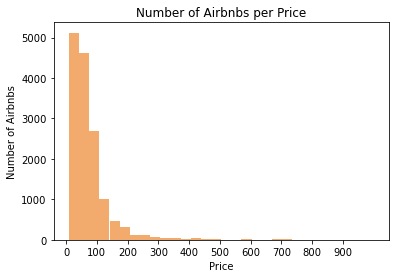

In [88]:
# Se grafica la distribución de los valores que toma la variable objetivo

plt.hist(data_new_1.Price, bins=30, color='#F2AB6D')
plt.xticks(np.arange(0, np.max(data_new_1.Price),100))
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")
plt.title("Number of Airbnbs per Price")
plt.show()

# Tratamiento de las 39 variables de nuestro análisis

#### Se elimina la variable "Square feet" ya que, aunque es relevante cuenta con 14182 missings.

In [89]:
data_new_1=data_new_1.drop(columns={"Square Feet"})

#### Tratamiento de la variable "Experiences offered" mediante el One Hot Encoder

In [90]:
data_new_1.Experiences_offered.value_counts()

none        14763
business        8
family          3
social          3
romantic        3
Name: Experiences_offered, dtype: int64

In [91]:
columns_dummies = ["Experiences_offered"]
dummies = pd.get_dummies(data_new_1[columns_dummies])
data_new_1 = pd.concat([data_new_1, dummies], axis = 1)
data_new_1 = data_new_1.drop(columns=columns_dummies)

In [92]:
data_new_1.head()

,Host_Name,Host Since,Host_Verifications,Neighbourhood_group_cleansed,City,Zipcode,Country Code,Property Type,Room Type,Accommodates,...,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated_host_listings_count,Features,Experiences_offered_business,Experiences_offered_family,Experiences_offered_none,Experiences_offered_romantic,Experiences_offered_social
0,John,11.02.16,"email,phone,reviews,kba",NaN,Austin,78733,US,Loft,Entire home/apt,2,...,10.0,10.0,moderate,1.0,"Host Is Superhost,Host Has Profile Pic,Host Id...",0,0,1,0,0
1,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8010,ES,Apartment,Entire home/apt,4,...,8.0,10.0,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ...",0,0,1,0,0
2,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8008,ES,Apartment,Entire home/apt,4,...,NaN,NaN,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ...",0,0,1,0,0
3,Damien,25.05.10,"email,phone,facebook,reviews,manual_offline,ju...",Eixample,Barcelona,8009,ES,Apartment,Entire home/apt,8,...,10.0,9.0,strict,24.0,"Host Has Profile Pic,Host Identity Verified,Re...",0,0,1,0,0
4,Javier,12.01.16,"email,phone,reviews,jumio",Eixample,Barcelona,8036,ES,Apartment,Entire home/apt,5,...,NaN,NaN,flexible,92.0,"Host Has Profile Pic,Host Identity Verified,Is...",0,0,1,0,0


#### Tratamiento de la variable Host Name (Angela: No se yo si deberiamos descartarla al igual que Host Since...)

In [93]:
data_new_1.Host_Name.value_counts()

Javier                 307
Raquel                 219
Ana                    199
Maria                  198
Carlos                 161
                      ... 
Encarni                  1
LaFraguaAudiovisual      1
Birgit                   1
Lara Y Javi              1
Kc                       1
Name: Host_Name, Length: 3276, dtype: int64

#### Tratamiento de la variable Host Verifications

In [94]:
data_new_1.Host_Verifications.value_counts()

email,phone,reviews,jumio                                                        3660
email,phone,reviews                                                              3504
email,phone,facebook,reviews,jumio                                                875
email,phone,reviews,jumio,government_id                                           860
email,phone,facebook,reviews                                                      748
                                                                                 ... 
email,phone,manual_offline                                                          1
email,phone,manual_online,reviews,manual_offline,jumio,government_id                1
email,phone,google,reviews,work_email                                               1
email,phone,reviews,jumio,kba,government_id                                         1
email,phone,facebook,reviews,jumio,offline_government_id,selfie,government_id       1
Name: Host_Verifications, Length: 206, dtype: int64